In [32]:
import numpy as np
import os
import skimage.filters as skfilters
import matplotlib.pyplot as plt
import skimage.io as io

from skimage import img_as_uint
from skimage.filters import threshold_otsu


In [33]:
small_files = os.listdir(os.path.join(os.getcwd(), 'small_tifs'))
for i in range(len(small_files)):
    small_files[i] = os.path.join(os.getcwd(), 'small_tifs', small_files[i])

In [34]:
small_files
images = [small_files[0], small_files[5], small_files[6]]

In [27]:
d3mko = io.imread(small_files[2])

In [5]:
images


['/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C1-day3.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C3-day3.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C2-day3.tif']

In [43]:
d3mko.shape

(718, 806)

In [30]:
thresh = threshold_otsu(d3mko)

In [31]:
binary = d3mko > thresh

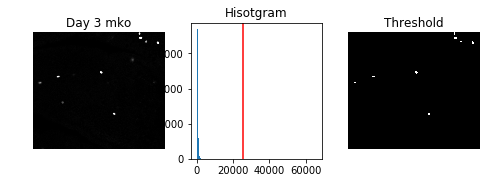

/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/pgb13/Documents/Temporary Image Downloads/RRobo/export/binary.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [78]:
thresh = threshold_otsu(d3mko)
binary = d3mko > thresh
fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(d3mko, cmap=plt.cm.gray)
ax[0].set_title('Day 3 mko')
ax[0].axis('off')

ax[1].hist(d3mko.ravel(), bins=256)
ax[1].set_title('Hisotgram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Threshold')
ax[2].axis('off')

plt.show()
io.imsave(os.path.join(os.getcwd(), 'export', 'binary.tif'), img_as_uint(binary))




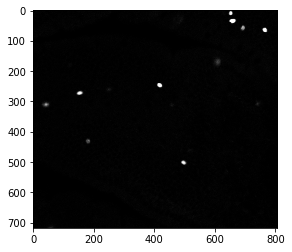

In [46]:
plt.imshow(d3mko, cmap=plt.cm.gray)

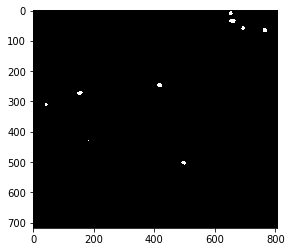

In [47]:
plt.imshow(binary, cmap=plt.cm.gray)

In [49]:
from skimage.filters import try_all_threshold


/Users/pgb13/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean


RuntimeError: Unable to find two maxima in histogram

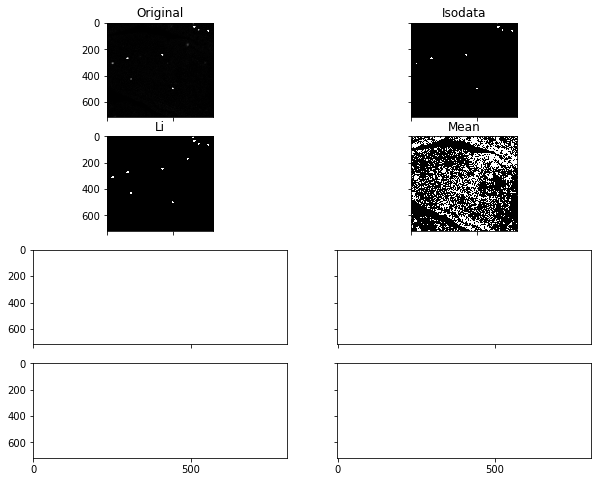

In [51]:
#im = d3mko
#fig, ax = try_all_threshold(im, figsize=(10,8))
#plt.show()
#commented out. These can be used to try all of the filtering methods

# Next Section - label image regions

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


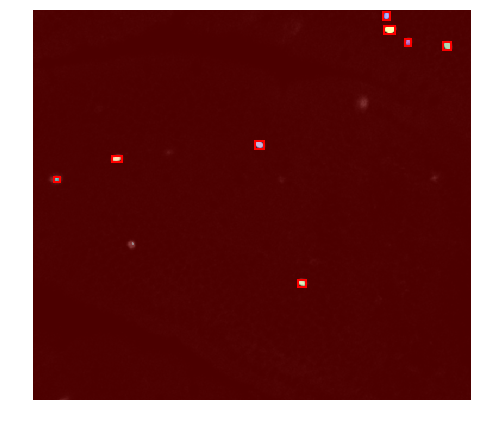

8


In [62]:

thresh = threshold_otsu(d3mko)
bw = closing(d3mko > thresh, square(3))

cleared = clear_border(bw)

label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=d3mko)
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(image_label_overlay)

nuclei = 0


for region in regionprops(label_image):
    if region.area >= 20:
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                 fill=False, edgecolor='red', linewidth=2)
        nuclei += 1
        ax.add_patch(rect)
        
ax.set_axis_off()
plt.tight_layout()
plt.show()
print(nuclei)


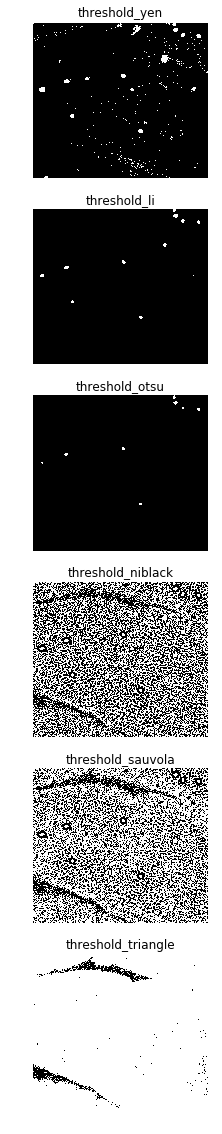

In [70]:
from skimage.filters import threshold_yen, threshold_adaptive, threshold_li, threshold_niblack, threshold_sauvola, threshold_triangle

thresh_list = [threshold_yen, threshold_li, threshold_otsu,
              threshold_niblack, threshold_sauvola, threshold_triangle]

fig, axes = plt.subplots(ncols=1, nrows=len(thresh_list), figsize=(50, 20))
    #ax[0] = plt.subplot(1, 3, 1)
    #ax[1] = plt.subplot(1, 3, 2)
    #ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])
ax = axes.ravel()
for i in range(len(thresh_list)):
    threshold = thresh_list[i]
    thresh = threshold(d3mko)
    binary = d3mko > thresh



    ax[i].imshow(binary, cmap=plt.cm.gray)
    ax[i].set_title(f'{threshold.__name__}')
    ax[i].axis('off')

plt.show()

In [79]:
small_files

['/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C1-day3.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C1-day3-1vs.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C3-day3-1vs.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C2-day3-1vs.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/day3_zstack.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C3-day3.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C2-day3.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/day3-1vs.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/day3.tif']

# TFP

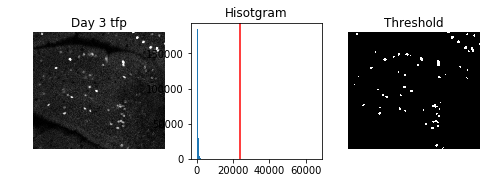

In [89]:
d3tfp = io.imread(small_files[1])


thresh = threshold_otsu(d3tfp)
binary = d3tfp > thresh
fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(d3tfp, cmap=plt.cm.gray)
ax[0].set_title('Day 3 tfp')
ax[0].axis('off')

ax[1].hist(d3mko.ravel(), bins=256)
ax[1].set_title('Hisotgram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Threshold')
ax[2].axis('off')

plt.show()
#io.imsave(os.path.join(os.getcwd(), 'export', 'thresh_tfp.tif'), img_as_uint(binary))

## Watershed segmentation

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max



In [90]:
distance = ndi.distance_transform_edt(binary)

In [91]:
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=binary)

In [93]:
markers = ndi.label(local_maxi)[0]

In [95]:
labels = watershed(-distance, markers, mask=binary)

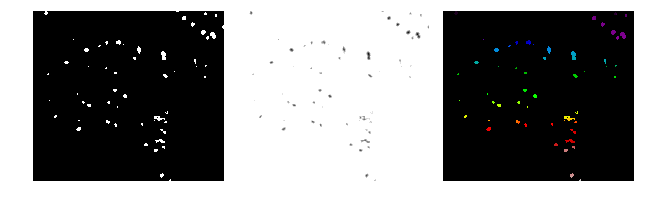

In [96]:
fig, axes = plt.subplots(ncols=3, figsize=(9,3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(binary, cmap=plt.cm.gray, interpolation='nearest')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [97]:
small_files

['/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C1-day3.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C1-day3-1vs.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C3-day3-1vs.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C2-day3-1vs.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/day3_zstack.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C3-day3.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C2-day3.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/day3-1vs.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/day3.tif']

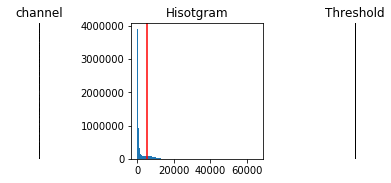

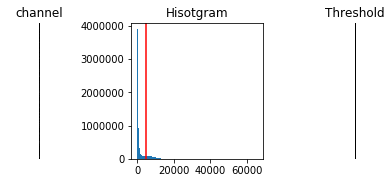

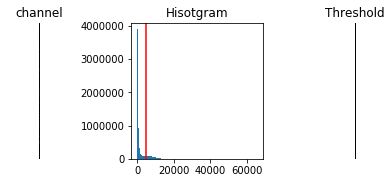

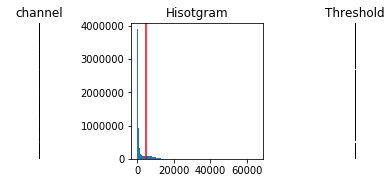

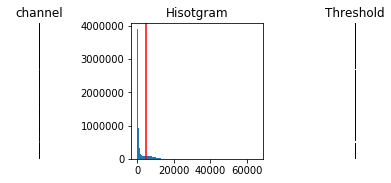

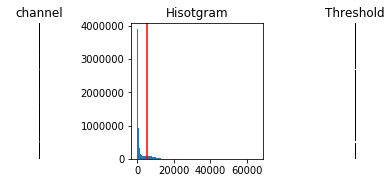

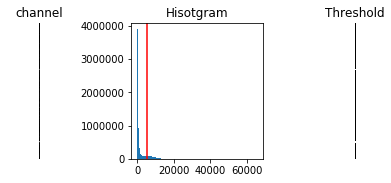

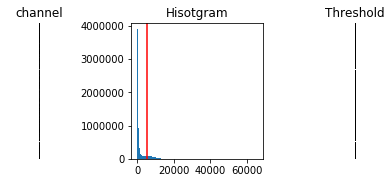

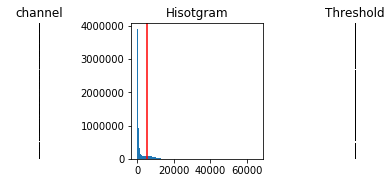

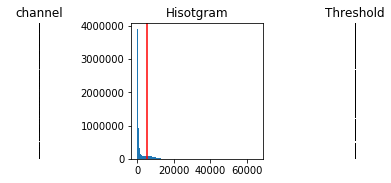

KeyboardInterrupt: 

In [105]:
stack = io.imread(small_files[8])
for plane, channel in enumerate(stack):
    thresh = threshold_otsu(channel)
    binary = channel > thresh
    fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(channel, cmap=plt.cm.gray)
    ax[0].set_title('channel')
    ax[0].axis('off')

    ax[1].hist(stack.ravel(), bins=256)
    ax[1].set_title('Hisotgram')
    ax[1].axvline(thresh, color='r')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Threshold')
    ax[2].axis('off')

    plt.show()
    

In [102]:
stack.shape

(1928, 1816, 3)

In [103]:
enumerate(stack)

## Running on slightly bigger images

In [6]:
images

['/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C1-day3.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C3-day3.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/small_tifs/C2-day3.tif']

In [28]:
from skimage.filters import threshold_li, threshold_triangle, threshold_sauvola, threshold_local

In [7]:
im_list = [io.imread(i) for i in images]

In [13]:
im_list[0].shape

(1928, 1816)

In [31]:
for i in range(len(im_list)):
    image = im_list[i]
    name = images[i]
    thresh = threshold_local(image, 77)
    binary = image > thresh
    io.imsave(os.path.join(os.getcwd(), 'export', str(i) + '_local.tif'), img_as_uint(binary))
    

In [35]:
bigfiles = os.listdir(os.path.join(os.getcwd(), 'big_tifs'))

In [37]:
bigfiles

['C2-MAX_RROBO2_6_jej.tif',
 'MAX_RROBO2_6_jej.tif',
 'C3-MAX_RROBO2_6_jej.tif',
 'sub_C1-MAX_RROBO2_6_jej.tif',
 'C1-MAX_RROBO2_6_jej.tif',
 'RROBO2_6_jej.tif']

In [38]:
bigfilepaths = [os.path.join(os.getcwd(), 'big_tifs', i) for i in bigfiles]

In [39]:
bigfilepaths

['/Users/pgb13/Documents/Temporary Image Downloads/RRobo/big_tifs/C2-MAX_RROBO2_6_jej.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/big_tifs/MAX_RROBO2_6_jej.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/big_tifs/C3-MAX_RROBO2_6_jej.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/big_tifs/sub_C1-MAX_RROBO2_6_jej.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/big_tifs/C1-MAX_RROBO2_6_jej.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/big_tifs/RROBO2_6_jej.tif']

In [40]:
bigmko = io.imread(bigfilepaths[2])

In [41]:
bigmko.shape

(6861, 4915)

In [42]:
thresh = threshold_otsu(bigmko)
binary = bigmko > thresh
io.imsave(os.path.join(os.getcwd(), 'bigmko_otsu.tif'), img_as_uint(binary))

/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/pgb13/Documents/Temporary Image Downloads/RRobo/bigmko_otsu.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [66]:
bigfilepaths

['/Users/pgb13/Documents/Temporary Image Downloads/RRobo/big_tifs/C2-MAX_RROBO2_6_jej.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/big_tifs/MAX_RROBO2_6_jej.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/big_tifs/C3-MAX_RROBO2_6_jej.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/big_tifs/sub_C1-MAX_RROBO2_6_jej.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/big_tifs/C1-MAX_RROBO2_6_jej.tif',
 '/Users/pgb13/Documents/Temporary Image Downloads/RRobo/big_tifs/RROBO2_6_jej.tif']

In [44]:
for i in range(len(bigfiles)):
    filepath = bigfilepaths[i]
    image = io.imread(bigfilepaths[i])
    thresh = threshold_otsu(image)
    binary = image > thresh
    io.imsave(os.path.join(os.getcwd(), 'export', bigfiles[i]), img_as_uint(binary))

/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/pgb13/Documents/Temporary Image Downloads/RRobo/export/C2-MAX_RROBO2_6_jej.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (6861, 4915, 3) looks like an RGB image
  warn(msg.format(image.shape))
/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/pgb13/Documents/Temporary Image Downloads/RRobo/export/C3-MAX_RROBO2_6_jej.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (12, 6861, 4915, 3) looks like an RGB image
  warn(msg.format(image.shape)

In [45]:
small_tfp = io.imread(os.path.join(os.getcwd(), 'small_tifs', 'C1-day3.tif'))

In [46]:
from scipy.ndimage import gaussian_filter
from skimage import img_as_float
from skimage.morphology import reconstruction

In [47]:
small_tfp_f = img_as_float(small_tfp)

In [67]:
big_names = os.listdir(os.path.join(os.getcwd(), 'big_tifs', 'zstack'))
big_filepaths = [os.path.join(os.getcwd(), 'big_tifs', 'zstack', i) for i in big_names]
big_stacks = [img_as_float(io.imread(i)) for i in big_filepaths]

KeyboardInterrupt: 

/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/pgb13/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


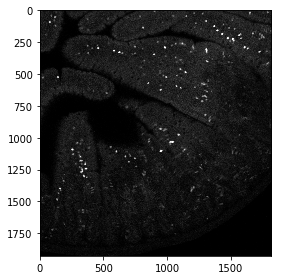

In [48]:
io.imshow(small_tfp_f)

In [50]:
small_tfp_g = gaussian_filter(small_tfp_f, 1)

/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/pgb13/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


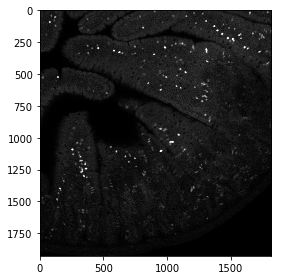

In [51]:
io.imshow(small_tfp_g)

In [52]:
seed = np.copy(small_tfp_g)

In [53]:
seed[1:-1,1:-1] = small_tfp_g.min()

In [54]:
mask = small_tfp_g

In [55]:
dilated = reconstruction(seed, mask, method='dilation')

/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/pgb13/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


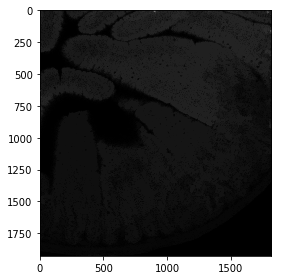

In [58]:
io.imshow(dilated)

In [59]:
subtracted_tfp = small_tfp_g - dilated

/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/pgb13/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


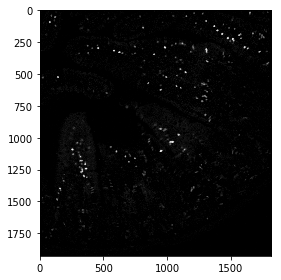

In [60]:
io.imshow(subtracted_tfp)

/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/Users/pgb13/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


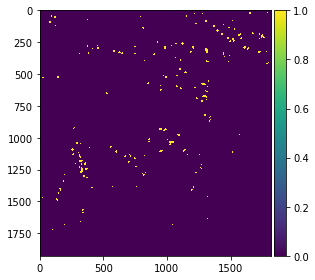

In [61]:
thresh = threshold_otsu(subtracted_tfp)
binary = subtracted_tfp > thresh
io.imshow(binary)

In [62]:
io.imsave(os.path.join(os.getcwd(), 'export', 'dilated.tif'), img_as_uint(dilated))

/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [65]:
io.imsave(os.path.join(os.getcwd(), 'export', 'sub_tfp_from_dilation.tif'), img_as_uint(subtracted_tfp))
#io.imsave(os.path.join(os.getcwd(), 'export', 'thresh_from_dilation.tif'), img_as_uint(binary))

/Users/pgb13/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
